In [4]:
##### Importing Relevant Libraries ######
#########################################

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler              ## (x-mean(variable))/standard_deviation(variable)
from sklearn.model_selection import StratifiedShuffleSplit    ## for datasplitting
 
from sklearn.model_selection import GridSearchCV              ## for hyperparameter finding
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix,f1_score         ## model evaluation metrics
from sklearn.tree import DecisionTreeClassifier          ## helps fitting a decision tree

In [5]:
data = pd.read_csv('customer-data.csv')

In [6]:
data.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


# Data Preparation

In [7]:
pd.set_option('display.max_rows', 11000)
data.nunique()    ## checking number of unique values of all columns

id                     10000
age                        4
gender                     2
race                       2
driving_experience         4
education                  3
income                     4
credit_score            9018
vehicle_ownership          2
vehicle_year               2
married                    2
children                   2
postal_code                4
annual_mileage            21
vehicle_type               2
speeding_violations       21
DUIs                       7
past_accidents            15
outcome                    2
dtype: int64

In [8]:
data['id'].duplicated().sum()  ## cheking for duplicate records

0

In [9]:
data = data.drop(data[['id']], axis=1)             ## id is  a nominal column and has no duplicate values so we can drop it

In [10]:
data.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [11]:
data.isnull().sum()    ## checking for null values in all columns

age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [12]:
## ************ age column *******************

data['age'].value_counts()

26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: age, dtype: int64

In [13]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesage = pd.get_dummies(data['age'], prefix='age',drop_first=True)
del data['age']
data = pd.concat([data,dummiesage],axis=1)

In [14]:
## ***************** driving_experience ********************

data['driving_experience'].value_counts()

0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: driving_experience, dtype: int64

In [15]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesde = pd.get_dummies(data['driving_experience'], prefix='driving_experience',drop_first=True)
del data['driving_experience']
data = pd.concat([data,dummiesde],axis=1)

In [16]:
## ****************** education column *****************

data['education'].value_counts()  ## none is equivavelent to null values

high school    4157
university     3928
none           1915
Name: education, dtype: int64

In [17]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesedu = pd.get_dummies(data['education'], prefix='education',drop_first=True)
del data['education']
data = pd.concat([data,dummiesedu],axis=1)

In [18]:
##******************** credit_score column************************

data['credit_score'].mean(), data['credit_score'].median(), data['credit_score'].isnull().sum()

(0.5158128096027941, 0.5250327586154788, 982)

In [19]:
data['credit_score'] = data['credit_score'].fillna(data['credit_score'].mean())    ## imputing with mean because it doesnt have outliers

In [20]:
##*********** annual_mileage column *********************

data['annual_mileage'].mean(), data['annual_mileage'].median(), data['annual_mileage'].isnull().sum()

(11697.003206900365, 12000.0, 957)

In [21]:
data['annual_mileage'] = data['annual_mileage'].fillna(data['annual_mileage'].mean())   ## imputing with mean because it doesnt have outliers

In [22]:
data.dtypes    ## checking data types

gender                        object
race                          object
income                        object
credit_score                 float64
vehicle_ownership               bool
vehicle_year                  object
married                         bool
children                        bool
postal_code                    int64
annual_mileage               float64
vehicle_type                  object
speeding_violations            int64
DUIs                           int64
past_accidents                 int64
outcome                         bool
age_26-39                      uint8
age_40-64                      uint8
age_65+                        uint8
driving_experience_10-19y      uint8
driving_experience_20-29y      uint8
driving_experience_30y+        uint8
education_none                 uint8
education_university           uint8
dtype: object

In [23]:
##***********************vehicle_year  *********************

data['vehicle_year'].value_counts() 

before 2015    6967
after 2015     3033
Name: vehicle_year, dtype: int64

In [24]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesvy = pd.get_dummies(data['vehicle_year'], prefix='vehicle_year')
del data['vehicle_year']
data = pd.concat([data,dummiesvy],axis=1)

In [25]:
##************************* vehicle_type ***********************

data['vehicle_type'].value_counts() 

sedan         9523
sports car     477
Name: vehicle_type, dtype: int64

In [26]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesvt = pd.get_dummies(data['vehicle_type'], prefix='vehicle_type')
del data['vehicle_type']
data = pd.concat([data,dummiesvt],axis=1)

In [27]:
data.dtypes

gender                        object
race                          object
income                        object
credit_score                 float64
vehicle_ownership               bool
married                         bool
children                        bool
postal_code                    int64
annual_mileage               float64
speeding_violations            int64
DUIs                           int64
past_accidents                 int64
outcome                         bool
age_26-39                      uint8
age_40-64                      uint8
age_65+                        uint8
driving_experience_10-19y      uint8
driving_experience_20-29y      uint8
driving_experience_30y+        uint8
education_none                 uint8
education_university           uint8
vehicle_year_after 2015        uint8
vehicle_year_before 2015       uint8
vehicle_type_sedan             uint8
vehicle_type_sports car        uint8
dtype: object

In [28]:
##***************** gender column *********************

data['gender'].value_counts() 

female    5010
male      4990
Name: gender, dtype: int64

In [29]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesgen = pd.get_dummies(data['gender'], prefix='gender')
del data['gender']
data = pd.concat([data,dummiesgen],axis=1)

In [30]:
##*********************** race column *************************************

data['race'].value_counts() 

majority    9012
minority     988
Name: race, dtype: int64

In [31]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesrace = pd.get_dummies(data['race'], prefix='race')
del data['race']
data = pd.concat([data,dummiesrace],axis=1)

In [32]:
##******************* income column ***********************

data['income'].value_counts() 

upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: income, dtype: int64

In [33]:
## creating dummies ,deleting the column and merging dummies dataframe with main (data) dataframe

dummiesinc = pd.get_dummies(data['income'], prefix='income',drop_first=True)
del data['income']
data = pd.concat([data,dummiesinc],axis=1)

In [34]:
data.shape

(10000, 29)

In [35]:
## *************** married, vehicle_ownership, children, outcome colmns ******************************
## importing labelencoder from sklearn library

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
## encoding boolean values as True as 1 and False as 0

data['married'] = le.fit_transform(data['married'])  
data['vehicle_ownership'] = le.fit_transform(data['vehicle_ownership'])
data['children'] = le.fit_transform(data['children'])
data['outcome'] = le.fit_transform(data['outcome'])

In [37]:
data.dtypes

credit_score                 float64
vehicle_ownership              int64
married                        int64
children                       int64
postal_code                    int64
annual_mileage               float64
speeding_violations            int64
DUIs                           int64
past_accidents                 int64
outcome                        int64
age_26-39                      uint8
age_40-64                      uint8
age_65+                        uint8
driving_experience_10-19y      uint8
driving_experience_20-29y      uint8
driving_experience_30y+        uint8
education_none                 uint8
education_university           uint8
vehicle_year_after 2015        uint8
vehicle_year_before 2015       uint8
vehicle_type_sedan             uint8
vehicle_type_sports car        uint8
gender_female                  uint8
gender_male                    uint8
race_majority                  uint8
race_minority                  uint8
income_poverty                 uint8
i

In [38]:
data.corr()  ## checking correlation

,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome,age_26-39,age_40-64,age_65+,driving_experience_10-19y,driving_experience_20-29y,driving_experience_30y+,education_none,education_university,vehicle_year_after 2015,vehicle_year_before 2015,vehicle_type_sedan,vehicle_type_sports car,gender_female,gender_male,race_majority,race_minority,income_poverty,income_upper class,income_working class
credit_score,1.000000,0.295689,0.267074,0.209515,0.008533,-0.157641,0.194645,0.120953,0.172077,-0.309010,-0.128558,0.201123,0.300127,-0.017554,0.181313,0.200549,-0.334260,0.321017,0.254574,-0.254574,0.013141,-0.013141,0.077478,-0.077478,0.037637,-0.037637,-0.542507,0.595553,-0.259231
vehicle_ownership,0.295689,1.000000,0.175626,0.125990,-0.004866,-0.092701,0.133868,0.086567,0.119521,-0.378921,-0.075489,0.118123,0.172213,-0.003889,0.113982,0.118979,-0.202821,0.193457,0.158579,-0.158579,-0.005647,0.005647,-0.007385,0.007385,0.034738,-0.034738,-0.358214,0.330552,-0.126664
married,0.267074,0.175626,1.000000,0.287009,0.012045,-0.439520,0.218855,0.120840,0.215269,-0.262104,-0.113672,0.147096,0.261284,-0.023209,0.143063,0.175284,-0.164203,0.163020,0.129638,-0.129638,-0.006905,0.006905,-0.008393,0.008393,0.021597,-0.021597,-0.280648,0.355069,-0.161366
children,0.209515,0.125990,0.287009,1.000000,0.020911,-0.425813,0.220415,0.115354,0.206295,-0.232835,-0.095023,0.161869,0.241979,-0.013024,0.158791,0.164297,-0.097736,0.108087,0.105189,-0.105189,0.008672,-0.008672,0.002640,-0.002640,-0.007575,0.007575,-0.221110,0.252946,-0.104488
postal_code,0.008533,-0.004866,0.012045,0.020911,1.000000,-0.127286,0.113686,0.038492,-0.116985,0.095889,-0.016657,0.020632,-0.001951,-0.006292,0.021163,-0.008646,-0.014905,0.019417,0.006958,-0.006958,0.006169,-0.006169,0.001996,-0.001996,-0.004655,0.004655,-0.022488,0.017843,0.005117
annual_mileage,-0.157641,-0.092701,-0.439520,-0.425813,-0.127286,1.000000,-0.308125,-0.111232,-0.187180,0.177575,0.077125,-0.113851,-0.168984,0.022294,-0.098025,-0.116257,0.095136,-0.108524,-0.073713,0.073713,0.010013,-0.010013,0.015068,-0.015068,0.001898,-0.001898,0.177805,-0.230349,0.095930
speeding_violations,0.194645,0.133868,0.218855,0.220415,0.113686,-0.308125,1.000000,0.359838,0.443074,-0.291862,-0.140326,0.130591,0.347132,-0.052092,0.289445,0.455347,-0.113901,0.120944,0.102700,-0.102700,-0.001812,0.001812,-0.202095,0.202095,0.014068,-0.014068,-0.220973,0.285162,-0.119806
DUIs,0.120953,0.086567,0.120840,0.115354,0.038492,-0.111232,0.359838,1.000000,0.259359,-0.189352,-0.079617,0.098929,0.196776,-0.023041,0.202010,0.262151,-0.068723,0.079483,0.049981,-0.049981,0.005156,-0.005156,-0.094202,0.094202,0.015296,-0.015296,-0.145383,0.176650,-0.059083
past_accidents,0.172077,0.119521,0.215269,0.206295,-0.116985,-0.187180,0.443074,0.259359,1.000000,-0.311495,-0.130299,0.142393,0.310890,-0.041026,0.285480,0.418129,-0.104558,0.104075,0.097587,-0.097587,0.013305,-0.013305,-0.223202,0.223202,0.008848,-0.008848,-0.214550,0.254239,-0.104814
outcome,-0.309010,-0.378921,-0.262104,-0.232835,0.095889,0.177575,-0.291862,-0.189352,-0.311495,1.000000,0.033844,-0.218482,-0.230832,-0.113065,-0.292739,-0.217548,0.166034,-0.152143,-0.294178,0.294178,-0.005620,0.005620,-0.107208,0.107208,-0.008280,0.008280,0.345574,-0.339101,0.137152


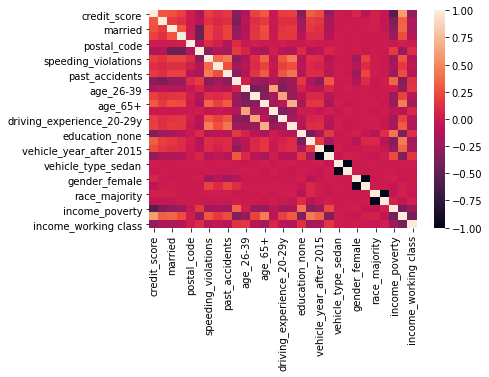

In [39]:
import seaborn as sns
sns.heatmap(data.corr())    ##plotting correlation matrix

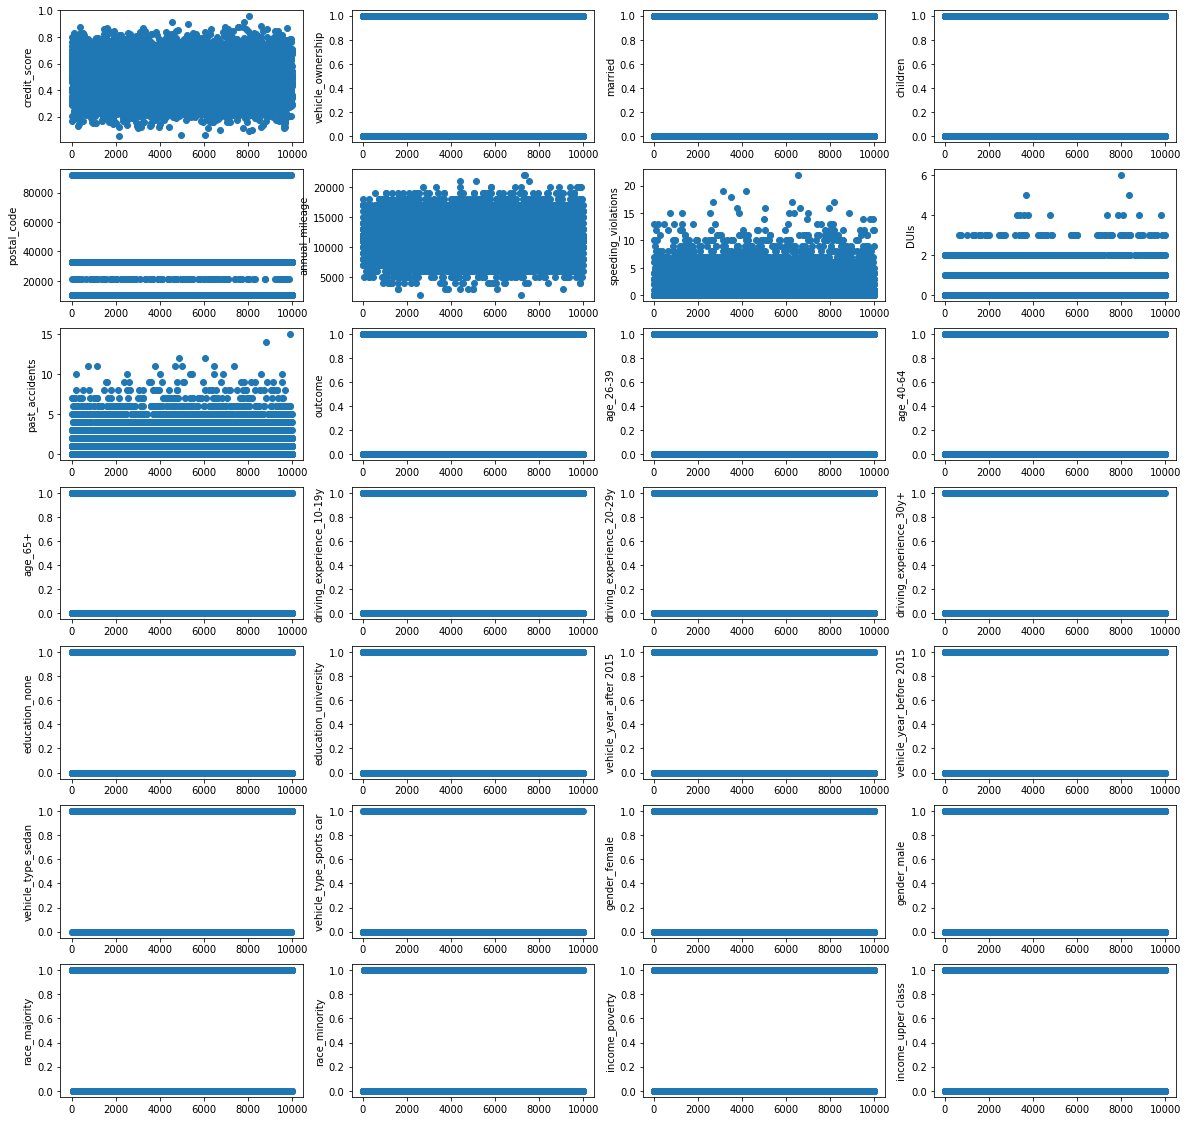

In [40]:
#### Visualizing numeric columns ######

numeric_cols = data.select_dtypes(include = np.number) ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 7
plot_cols = 4

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

In [41]:
data.shape

(10000, 29)

In [42]:
scaler = StandardScaler() 

scaler.fit(data[['credit_score','postal_code','annual_mileage']]) ### it will compute mean and standard deviation of every column

data[['credit_score','postal_code','annual_mileage']] = scaler.transform(data[['credit_score','postal_code','annual_mileage']])  ## transforming and reassigning names of columns

In [43]:
data.head()

,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome,age_26-39,age_40-64,age_65+,driving_experience_10-19y,driving_experience_20-29y,driving_experience_30y+,education_none,education_university,vehicle_year_after 2015,vehicle_year_before 2015,vehicle_type_sedan,vehicle_type_sports car,gender_female,gender_male,race_majority,race_minority,income_poverty,income_upper class,income_working class
0,0.865914,1,0,1,-0.508946,0.113057,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0
1,-1.208879,0,0,0,-0.508946,1.605576,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0
2,-0.173367,1,0,0,-0.508946,-0.260073,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1
3,-2.369485,1,0,1,0.682034,-0.260073,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1
4,-0.974770,1,0,0,0.682034,0.113057,2,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1


# Model Data Preparation

In [44]:
features = data.drop(['outcome'],axis=1)   ## dropping target column and storing all features in features variable
target = data['outcome']                   ## selecting only target column (outcome) and storing in target variable

In [45]:
features.shape, target.shape

((10000, 28), (10000,))

In [46]:
target.value_counts()   ## imbalanced dataset

0    6867
1    3133
Name: outcome, dtype: int64

In [47]:
##### Creating a test set to validate the model on ######

split_size = 0.2

split_ins = StratifiedShuffleSplit(n_splits=1, test_size=split_size, random_state=1000)

splits = split_ins.split(features,target)

for train_index, test_index in splits:
    xtrain = features.iloc[train_index,:]   ## features for the training set
    ytrain = target[train_index]            ## target values for the training set
    xval = features.iloc[test_index,:]      ## features for the validation set
    yval = target[test_index]               ## targets for the validation set

In [48]:
xtrain.shape, ytrain.shape, xval.shape, yval.shape

((8000, 28), (8000,), (2000, 28), (2000,))

# Logistic Regression Model

In [49]:
LR_model = LogisticRegression(penalty ='none' ,class_weight = 'balanced',max_iter=200,random_state=1000)

In [50]:
LR_model.fit(xtrain,ytrain)                  ##training the model

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=1000, solver='lbfgs',
                   tol=0.0001, verbose=0, warm_start=False)

In [51]:
prediction_train = LR_model.predict_proba(xtrain)                 ## applies a threshold of 0.5

[[4450 1044]
 [ 383 2123]]
The F1-SCORE on the train set prediction  0.9172607474616548


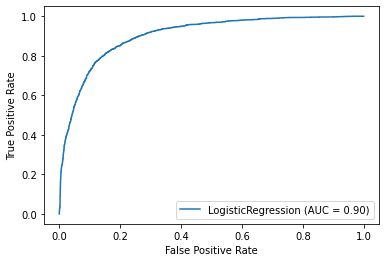

In [52]:
print(confusion_matrix(y_true = ytrain, y_pred = LR_model.predict(xtrain)))                  ##confusion matrix for pred on train set

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=ytrain,y_pred = LR_model.predict(xtrain),sample_weight = ytrain))   ## calculating F score
plot_roc_curve(LR_model,X =xtrain, y= ytrain)  ## plotting roc and auc curve

In [53]:
##******************** validation set **********************************
predictionval = LR_model.predict_proba(xval) ### applies a threshold of 0.5

[[1103  270]
 [  87  540]]
The F1-SCORE on the validation set prediction  0.9254498714652957


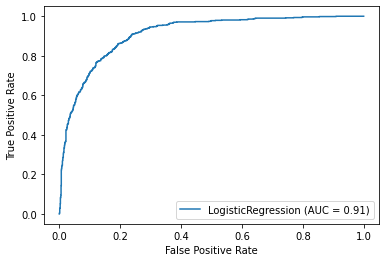

In [54]:
print(confusion_matrix(y_true = yval, y_pred = LR_model.predict(xval)))          ## confusion matrix for pred on validation set

print ('The F1-SCORE on the validation set prediction ',f1_score(y_true=yval,y_pred = LR_model.predict(xval),sample_weight = yval))   ## calculating F score
plot_roc_curve(LR_model,X =xval, y= yval)         ## plotting roc and auc curve 

# Decision Tree Model

In [55]:
clf = DecisionTreeClassifier()

params={'class_weight':['balanced'], 
        'max_features' : [1,5],
        'max_depth' : [6,7,8,9,10],
        'criterion' :['gini','entropy'],
        'min_samples_split' : [2,5,10,20]}

In [56]:
##### Fitting grid search cv to find the best combination of hyper parameters ####

grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 5,scoring = 'f1', return_train_score=True)

grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': ['balanced'],
                       

In [57]:
grid_search.best_estimator_   ## shows best set of parameter

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features=5,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [58]:
clf = grid_search.best_estimator_

In [59]:
clf.fit(xtrain,ytrain)   ## fitting with best set of parameters given by gridsearchcv

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features=5,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

[[4378 1116]
 [ 395 2111]]
The F1-SCORE on the train set prediction  0.9144466103530432


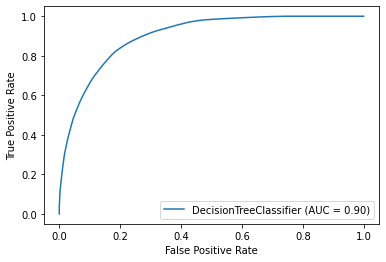

In [60]:
## Evaluating model on train set

predicted_train = clf.predict(xtrain)      # prediction on train set

plot_roc_curve(clf,X =xtrain, y= ytrain)     # roc and auc curve

print(confusion_matrix(y_true = ytrain, y_pred = predicted_train))   # printing confusion matrix

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=ytrain,y_pred = predicted_train,sample_weight = ytrain))  # calculating F1 score

[[1069  304]
 [ 110  517]]
The F1-SCORE on the validation set prediction  0.9038461538461539


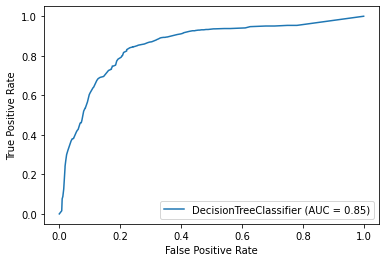

In [61]:
## Evaluating model on train set

predicted_val = clf.predict(xval)         # prediction on validation set

plot_roc_curve(clf,X =xval, y= yval)            # roc and auc curve

print(confusion_matrix(y_true = yval, y_pred = predicted_val))                # printing confusion matrix

print ('The F1-SCORE on the validation set prediction ',f1_score(y_true=yval,y_pred = predicted_val,sample_weight = yval))      # calculating F1 score

# Random Forest Model

In [62]:
from sklearn.ensemble import RandomForestClassifier         ## models from sklearn

In [63]:
#### Fitting a random forest classifier ######

clf = RandomForestClassifier()                          ## random forest function from  sklearn

params={'n_estimators':[50,70,100],                     ## number of trees combination i want
        'class_weight':['balanced'],                
        'criterion':['gini'],                           ## two different methods to find purity of node
        'max_depth':[3,4,5],                            ## depth combination
        'min_samples_split': [2,3,4,5],                 ## minimum number of samples must be there for occurence of a split
        'max_samples':[0.7,0.8,0.9],
        'max_features':[10,12,15,18,20]}                ## parameter combinations

In [ ]:
grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 5,scoring = 'f1',return_train_score=True)

grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [ ]:
grid_search.best_estimator_    ## printing best estimators

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=20,
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf = grid_search.best_estimator_  

In [ ]:
clf.fit(xtrain, ytrain)     ## training model with best estimators obtained from gridsearchcv

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=20,
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[[4482 1012]
 [ 362 2144]]
The F1-SCORE on the train set prediction  0.9221505376344087


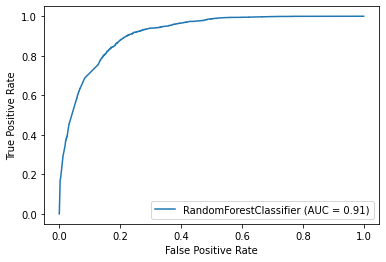

In [ ]:
## Evaluating model on train set

predicted_train = clf.predict(xtrain)          # prediction on train set

plot_roc_curve(clf,X =xtrain, y= ytrain)         # roc and auc curve

print(confusion_matrix(y_true = ytrain, y_pred = predicted_train))      # printing confusion matrix

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=ytrain,y_pred = predicted_train,sample_weight = ytrain))  # calculating F1 score

[[1105  268]
 [  92  535]]
The F1-SCORE on the train set prediction  0.9208261617900172


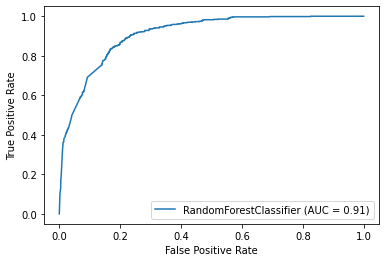

In [ ]:
##**************** validation set *********************************

predicted_train = clf.predict(xval)     # prediction on validation set

plot_roc_curve(clf,X =xval, y= yval)      # roc and auc curve

print(confusion_matrix(y_true = yval, y_pred = predicted_train))       # printing confusion matrix

print ('The F1-SCORE on the validation set prediction ',f1_score(y_true=yval,y_pred = predicted_train,sample_weight = yval))      # calculating F1 score

# XG Boost Model

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
## trying with different parameters

xgb_params = {  
                "learning_rate":[0.01,0.05,0.1,0.3,0.5],
                "gamma":[i/10.0 for i in range(0,5)],
                "max_depth": [2,3,4,5,6,7,8],
                "min_child_weight":[1,2,5,10],
                "max_delta_step":[0,1,2,5,10],
                "subsample":[i/10.0 for i in range(5,10)],
                "colsample_bytree":[i/10.0 for i in range(5,10)],
                "colsample_bylevel":[i/10.0 for i in range(5,10)],
                "reg_lambda":[1e-5, 1e-2, 0.1, 1, 100], 
                "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
                "scale_pos_weight":[1,2,3,4,5,6,7,8,9],
                "n_estimators":[100,500,700,1000]
             }

In [ ]:
xgb=XGBClassifier(objective='binary:logistic')   ## binary classification 

In [ ]:
n_iter=10

random_search=RandomizedSearchCV(xgb,n_jobs=-1,cv=10,n_iter=n_iter,scoring='roc_auc',
                                 param_distributions=xgb_params)

In [ ]:
random_search.fit(xtrain,ytrain)  

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         

In [ ]:
## defining a function to get report means summary

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.920 (std: 0.00900)
Parameters: {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_lambda': 1e-05, 'reg_alpha': 1, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 1, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.8}

Model with rank: 2
Mean validation score: 0.919 (std: 0.00924)
Parameters: {'subsample': 0.5, 'scale_pos_weight': 6, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 700, 'min_child_weight': 2, 'max_depth': 2, 'max_delta_step': 1, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.6}

Model with rank: 3
Mean validation score: 0.917 (std: 0.00907)
Parameters: {'subsample': 0.5, 'scale_pos_weight': 6, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 4, 'max_delta_step': 10, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.8}

Model with rank: 4
Mean va

In [ ]:
random_search.best_estimator_   ## best estimators

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
              learning_rate=0.01, max_delta_step=1, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1e-05, scale_pos_weight=2, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [ ]:
xgbmodel = random_search.best_estimator_

In [ ]:
cross_val_score(xgbmodel,xtrain,ytrain,scoring='roc_auc',verbose=10,n_jobs=-1,cv=10)   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   44.0s finished


array([0.92100088, 0.9238964 , 0.90685346, 0.91667574, 0.93516281,
       0.9330329 , 0.92421818, 0.90838545, 0.91245818, 0.91924   ])

In [ ]:
scores = [0.92100088, 0.9238964 , 0.90685346, 0.91667574, 0.93516281,
       0.9330329 , 0.92421818, 0.90838545, 0.91245818, 0.91924   ]

In [ ]:
scores

[0.92100088,
 0.9238964,
 0.90685346,
 0.91667574,
 0.93516281,
 0.9330329,
 0.92421818,
 0.90838545,
 0.91245818,
 0.91924]

# Questions & Answers

In [64]:
data = pd.read_csv('customer-data.csv')

In [65]:
data.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [66]:
#1. What proportion of customers with a credit score below 0.2 made a claim in the last year?
#Ans:- Out of 98 customers who were having credit score less than 0.2, only 59 customers made a claim.
#Solution:-
print('Total number of customers having credit score less than 0.2 is',sum(data['credit_score']<0.2))                         
sum((data['credit_score']<0.2) & (data['outcome']==True))           

Total number of customers having credit score less than 0.2 is 98


59

In [67]:
#2. What is the average number of speeding violations among customers with driving experience between 20 and 29 years (inclusive)?
#Ans:- The average number of speeding violations among customers with driving experience between 20 and 29 years (inclusive) is 2.734308636149127.
#Solution:-
newdf = data.loc[data['driving_experience']=='20-29y']            ## all rows where customers have 20-29 years of driving experience
newdf['speeding_violations'].mean()

2.734308636149127

In [68]:
#3. What if you consider only the people in this group who drive a sports car?
#Ans:- The average number of speeding violations among customers with sports car is 1.50104821802935.
#Solution:-
newdf2 = data.loc[data['vehicle_type']=='sports car']            ## all rows where customers have sports car
newdf2['speeding_violations'].mean()

1.50104821802935

In [69]:
#4. What is the standard deviation in annual mileage?
#Ans:- Standard Deviation of annual mileage column is 2818.278688843016.
#Solution:-
"Standard Deviation of annual mileage column is % s "% (np.std(data['annual_mileage']))

'Standard Deviation of annual mileage column is 2818.278688843016 '

In [70]:
#***********************************************************************************************************************************************************

In [71]:
#1. Are there particular customer types?
#Ans:- The customers belonging to the majority race and having vehicle of before 2015 are more likely to take claims.Also, customers having Sedan car and zero 
#      driving under the influence (DUIs) charges are more likely to take claims.
#Solution:-
truedf = data.loc[data['outcome']==True]
truedf.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True
7,461006,26-39,female,majority,0-9y,university,working class,0.468689,False,after 2015,False,True,10238,14000.0,sedan,0,0,0,True
9,445911,40-64,female,majority,0-9y,high school,upper class,0.561531,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,True
17,24851,16-25,male,majority,0-9y,none,poverty,NaN,False,before 2015,True,False,32765,12000.0,sedan,0,0,0,True


In [72]:
#2. What do claimants have in common?
#Ans:- The claimants have common things such as, many(89.76%) claimants belong to majority race, also many (84.81%) claimants have vehicles of the year before 2015,
#      along with that many (89.89%) customers have sedan car and also many (87.95%) have zero 'driving under the influence'(DUIs)
#Solution:-
print('The vehicle_type column have :\n',truedf['vehicle_type'].value_counts())
print('The percent of Sedan car is :', ((2978/3313)*100))
print('****************************************************************')
print('The race column :\n',truedf['race'].value_counts())
print('The percent of majority race is :', ((2812/3313)*100))
print('****************************************************************')
print('The DUIs column :\n',truedf['DUIs'].value_counts())
print('The percent of zero DUIs is :', ((2914/3313)*100))
print('****************************************************************')
print('The vehicle_year column :\n',truedf['vehicle_year'].value_counts())
print('The percent of the year before 2015 is :', ((2810/3313)*100))

The vehicle_type column have :
 sedan         2978
sports car     155
Name: vehicle_type, dtype: int64
The percent of Sedan car is : 89.88831874434048
****************************************************************
The race column :
 majority    2812
minority     321
Name: race, dtype: int64
The percent of majority race is : 84.87775430123754
****************************************************************
The DUIs column :
 0    2914
1     188
2      22
3       6
4       3
Name: DUIs, dtype: int64
The percent of zero DUIs is : 87.95653486266224
****************************************************************
The vehicle_year column :
 before 2015    2810
after 2015      323
Name: vehicle_year, dtype: int64
The percent of the year before 2015 is : 84.81738605493511


In [73]:
#3. How does the number of claims vary between postcodes?
#Ans:- As the postal code increases, the number of claims decreases. The highest number of claims (1886) by customers are of Postal code 10238.
#      The average number of claims (927,200) by customers are of Postal code 32765 and 92101. 
#      The lowest number of claims (120) by customers are of Postal code 21217.
#Solution:-
truedf['postal_code'].value_counts()

10238    1886
32765     927
92101     200
21217     120
Name: postal_code, dtype: int64

In [74]:
#******************************************************************************************************************************************************

In [75]:
#1. Are there any problems with the data you have been given that should be kept in mind when modelling?
#Ans:- Yes, the data has certain problems like the education of many (1915) customers were none which could mean that either they have not studied
#      or education is not known. Credit score(982 nulls) and annual mileage (957 nulls) columns were having many null values which are important features.

In [76]:
#2. Has the client collected the right data for their business needs?
#Ans: Yes, the client has collected the right data.

In [77]:
#3. What recommendations would you make to the client for future data collection?
#Ans:- 1.The range of age cateogry should be less for more better analysis of the data.
#      2.Try to mention the number of children which could increase the spendings of customer and as a result also may affect the claims. 
#      3.The company should try decrease the empty records from Credit score and annual mileage columns.

# Working Of Model

**Introduction** : 
In the Machine Learning world, Random Forest models are a kind of non 
parametric models that can be used both for regression and classification. They are one of the most popular ensemble methods (Ensemble method is a machine learning technique that combines several base models in order to produce one optimal predictive model), belonging to the specific category of Bagging methods(it is a simple and very powerful ensemble method).                         
**Working Procedure :**                                     
*Step 1 : Training the model.*                  
1.We create a bootstrapped data set for each tree. (Bootstrapping is a statistical procedure that resamples a single dataset to create many simulated samples).                
2.Then we create a decision tree using its corresponding data set, but at each node use a random sub sample of variables or features to split on. (Decision tree is a Machine Learning Algorithm which involves in making a tree shaped diagram to analyse the data which breaks into different branches to make predictions and give statistical probability and those branches are called nodes).         
3.Repeat all these three steps hundreds of times to build a massive forest with a wide variety of trees. This variety is what makes a Random Forest way better than a single decision tree.                        
*Step 2: Making predictions.*             
After model gets trained, making predictions with a Random Forest is very easy. We just have to take each of our individual trees, pass the observation for which we want to make a prediction through them, get a prediction from every tree and then obtain an overall, aggregated (average) prediction. 

**Conclusion:**                         
Random Forests are very flexible and powerful Machine Learning models that are highly used in commercial and industrial applications, along with Boosting models and Artificial Neural Networks.

# Summary

**Logistic Model** --> 
Train score : 0.9172607474616548 and AUC= 0.90.                        
Validation score : 0.9254498714652957 and AUC= 0.91.

**Decision Tree Model**-->
Train score : 0.9144466103530432 and AUC= 0.90.                                
Validation score : 0.9038461538461539 and AUC= 0.85.

**Random Forest Model**-->
Train score : 0.9221505376344087 and AUC= 0.91.                                 
Validation score : 0.9208261617900172 and AUC= 0.91.

**XGBoost Model**--> 
Best Cross Validation score : 0.93516281.

***Conclusion:***
As the improvement of model is not so much, we can finalise the Random Forest Model.